In [1]:
%pip install scikit-lego

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 6.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.base import clone
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, recall_score, roc_auc_score, roc_curve, r2_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklego.linear_model import LADRegression

In [3]:
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Correlation between energy and explicit: 0.09695504764627079


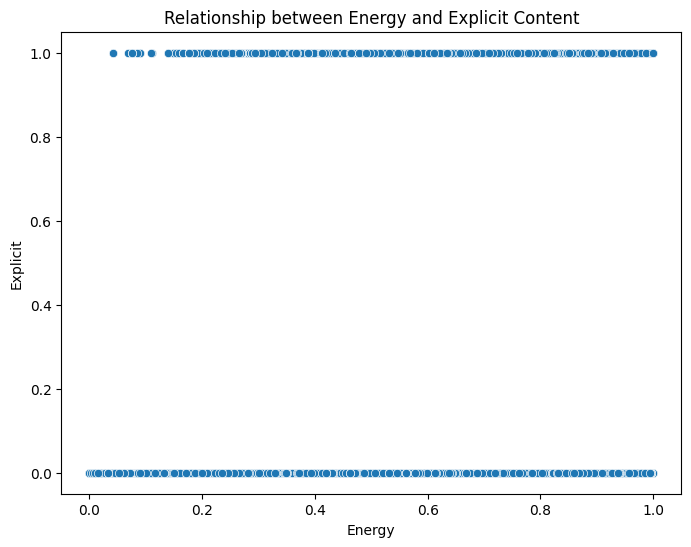

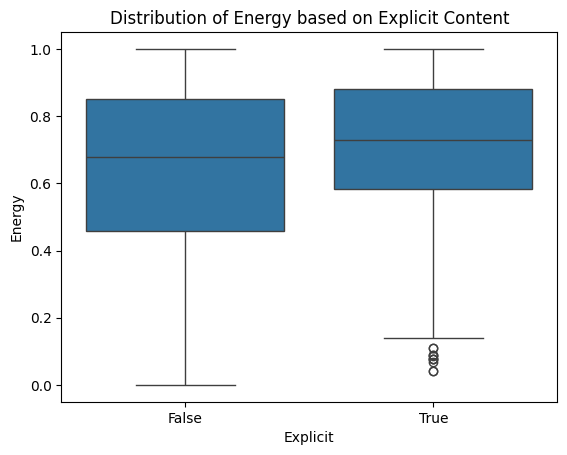

In [6]:
# Choosing predictor and response variable
correlation = df['energy'].corr(df['explicit'])
print(f"Correlation between energy and explicit: {correlation}")

# Create a scatter plot to visualize the relationship between energy and explicit.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='energy', y='explicit')
plt.title('Relationship between Energy and Explicit Content')
plt.xlabel('Energy')
plt.ylabel('Explicit')
plt.show()

# Box plot to see the distribution of energy based on whether a song is explicit or not
sns.boxplot(data=df, x='explicit', y='energy')
plt.title('Distribution of Energy based on Explicit Content')
plt.xlabel('Explicit')
plt.ylabel('Energy')
plt.show()

## Modified Cleaning Function

1. We're choosing 'explicit' as our binary categorical response variable.

2. Our predictor variable is 'energy'.

For ease of this check in, we're modifying our cleaning function to only include determining characteristics, our response variable, and our predictor variable.

In [ ]:
# Data Cleaning Function
def clean_data(df):
  clean_df = df.copy()
  clean_df = clean_df.drop('Unnamed: 0', axis=1, errors='ignore')
  clean_df = clean_df.dropna()
  clean_df['explicit'] = clean_df['explicit'].astype(int)
  clean_df = clean_df[['track_id', 'artists', 'album_name', 'track_name', 'energy','explicit']]
  return clean_df

# Apply the function to the DataFrame
spotify_clean = clean_data(df)


In [ ]:
# Split data into train and test
train_spotify, val_spotify = train_test_split(spotify_clean, test_size=0.2, random_state=42)
train_spotify

,track_id,artists,album_name,track_name,energy,explicit
96253,2dBjh7rBHfTtKVIDY89g5G,Seu Jorge,"Musicas para Churrasco, Vol.1 (Ao Vivo) (Delux...",Carolina (Ao Vivo),0.880,0
70417,3d09lKFNMjL28k0B0TcQhW,Chyi Chin,"""1"" (壹)",大約在冬季,0.361,0
66688,1IGSLXykccmp1TSqhYnden,Babyboomboom,English and French,"Heads, Shoulders, Knees and Toes (Tête, Epaule...",0.225,0
51391,67KTXqxMEyBMq3LApqCgNV,Sidhu Moose Wala;DIVINE,Moosetape,Moosedrilla (feat. DIVINE),0.829,0
95123,2Qx9yW1HKfX04jXSAbteiK,Rumbavana,Pa Que Lo Goces Con Ganas,El Capitolio,0.702,0
...,...,...,...,...,...,...
76821,0xmnMoo0YxOxd14xtquPsb,Phil Coulter,Country Serenity,You Raise Me Up,0.190,0
110269,13GV28kgnu0P8IrYfrgwIc,Sajanka,Time of India,Lord Shiva,0.924,0
103695,3cHu1UqgGTMPLiGrWDQHVC,Frankie Valli & The Four Seasons,Christmas Music - Holiday Hits,I Saw Mommy Kissing Santa Claus,0.560,0
860,2VVWWwQ3FiWnmbukTb6Kd3,The Mayries,I Will Wait,I Will Wait,0.107,0


In [ ]:
#Class imbalance
train_spotify['explicit'].value_counts()

,count
explicit,
0,83348
1,7851


In [ ]:
7851/(7851+83348) #Really small percentage of explicit (True)

0.08608647024638429

# Stage 5: Logistic Regression

3. Logistic regression, confusion matrix, prediction accuracy, prediction error, true positive rate, true negative rate on training data.

We're using


*   Predictor X: Energy
*   Response y: Explicit



In [ ]:
# Compute a Logistic Regression fit for the training dataset.
# Added class_weight to balance classifications
lr_train = LogisticRegression(solver='liblinear', class_weight='balanced')
lr_train.fit(X=train_spotify[['energy']], y=train_spotify['explicit'].values)

# View the model intercept and coefficients
lr_train.intercept_, lr_train.coef_


(array([-1.190757]), array([[1.75317216]]))

In [ ]:
val_spotify.sample(10)

,track_id,artists,album_name,track_name,energy,explicit
54810,2NYzqRkmSgouTJkD56vM0Q,Yimino;Amanda Zamolo;Ed Roughton,Breaker,Auad,0.30400,0
86139,3RXdPd3JIR8oZnWljpL3dS,Set It Off,Slowed + Reverbed 2022,Skeleton - Slowed & Reverb,0.74900,0
75388,1GyODtIqjM5AO3z5dEJwRg,Liquid Mind,Liquid Mind II: Slow World,Blue Seven,0.16900,0
97673,1IA3GpxXclqpsWgvtV4l3h,Fernando & Sorocaba,A Uma Música de Distância,Diz Pra Mim,0.83900,0
43296,4rLLu3bHCRCpCN1qXYykF5,Sync 3;Ericka Nascimento,Nos Braços do Pai: Live At Dissenso Studio,Nos Braços do Pai: Live At Dissenso Studio,0.30600,0
97288,36j2tEnRv7ZFmWZrpmej84,Liu & Léu,Jeitão de Caboclo,Prato do Dia,0.57800,0
101360,6UT7KpL0wkYVBNSydJFCSi,White Noise for Babies;Crickets;Baby Sleep Sounds,Cricket Sounds,Cricket Sound 4 - Loopable With No Fade,0.00325,0
33494,5qUnGmSSJsl1uQpTWwnyvr,Reznik,Bateman,Linka Důvěry,0.85300,1
13881,7ChU9YePBc2Dbwm2YicNXR,Marshall Jefferson;Roy Davis Jr.;Umosia,Love Don't Let Me Down,Love Don't Let Me Down - Primal Auto Soul Mix,0.36100,0
80934,64bX3WWzjUomaRfPcQvCNn,Anuradha Paudwal,Saajan (Original Motion Picture Soundtrack),Bahut Pyar Karte Hai - Female Version,0.49000,0


5. We chose a threshold of 0.5 to help with classification imbalance as there were so few explicit songs (~8% of our training set).

In [ ]:
# sample_index = [18726, 28097, 29054, 32086, 32670, 32366,
                # 33555, 42819, 47008, 51460, 59311, 60383,
                # 60877, 61000, 61024, 68154, 70999, 71790,
                # 72713, 89458, 90417, 93829, 104531, 113186,]  # Sample indices with both 0 and 1 for explicit
#spotify_val_sample = val_spotify.loc[sample_index,:]  # Subset the validation data using the sample indices

threshold = 0.5  # Set the threshold for binary classification

# Proceed with the prediction
pred_spotify_sample = pd.DataFrame(dict(
    explicit = val_spotify['explicit'],
    lr_predict = lr_train.predict_proba(val_spotify[['energy']])[:, 1],  # Probabilities for 'explicit' class (1)
    lr_predict_binary = (lr_train.predict_proba(val_spotify[['energy']])[:, 1] >= threshold).astype(int)  # Binary predictions (0 or 1)
))

# Display the observed vs predicted table
pred_spotify_sample


,explicit,lr_predict,lr_predict_binary
113186,0,0.464470,0
42819,0,0.635794,1
59311,0,0.554048,1
90417,0,0.372608,0
61000,0,0.612772,1
...,...,...,...
83384,0,0.458370,0
102335,0,0.289466,0
78411,0,0.601482,1
86528,0,0.531427,1


In [ ]:
# Create Confusion Matrix
conf_lr = confusion_matrix(y_true=pred_spotify_sample['explicit'], y_pred=pred_spotify_sample['lr_predict_binary'])
conf_lr

array([[10477, 10427],
       [  770,  1126]])

In [ ]:
# Prediction Accuracy
# Both of the lines below should print the same thing
(conf_lr[0,0] + conf_lr[1,1]) / conf_lr.sum()
accuracy_score(y_true=pred_spotify_sample['explicit'], y_pred=pred_spotify_sample['lr_predict_binary'])

0.5089035087719298

In [ ]:
# Prediction Error
(conf_lr[0,1] + conf_lr[1,0])/conf_lr.sum()

0.4910964912280702

In [ ]:
# Sensitivity (TPR)
# Both of the lines below should print the same thing
conf_lr[1,1] / conf_lr[1,:].sum()
recall_score(y_true=pred_spotify_sample['explicit'], y_pred=pred_spotify_sample['lr_predict_binary'])

0.5938818565400844

In [ ]:
# Specificity (TNR)
# Both of the lines below should print the same thing
conf_lr[0,0] / conf_lr[0,:].sum()
recall_score(y_true=pred_spotify_sample['explicit'], y_pred=pred_spotify_sample['lr_predict_binary'], pos_label=0)

0.5011959433601225

In [ ]:
# Predicted Probability Densities
# Using a histogram because there are so few samples
px.histogram(pred_spotify_sample, x='lr_predict', color='explicit', nbins=24, opacity=0.5, barmode='overlay',)

4. ROC Curve & AUC on validation data set

In [ ]:
# ROC Curve
lr_fpr_sample, lr_tpr_sample, lr_thresholds_sample = roc_curve(y_true=pred_spotify_sample['explicit'], y_score=pred_spotify_sample['lr_predict'])
lr_thresholds_sample
roc_lr_sample = pd.DataFrame({
    'False Positive Rate': lr_fpr_sample,
    'True Positive Rate': lr_tpr_sample,
    'Model': 'Logistic Regression'
}, index=lr_thresholds_sample)
roc_sample_df = pd.concat([roc_lr_sample])
px.line(roc_sample_df, x='False Positive Rate', y='True Positive Rate', color='Model', width=700, height=500)

In [ ]:
# Area Under the Curve (under the ROC curve) Score
lr_auc_sample = roc_auc_score(y_true=pred_spotify_sample['explicit'], y_score=pred_spotify_sample['lr_predict'])
print("Logistic Regression AUC: ", lr_auc_sample.round(3))

Logistic Regression AUC:  0.585


In [ ]:
# Cross Validation for Model Performance
X = val_spotify[['energy']]
y = val_spotify['explicit']
cross_val_score(lr_train, X, y, cv=5, scoring='roc_auc')

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_index, test_index in skfolds.split(X, y):
    clone_lr = clone(lr_train)
    X_train_folds = X.iloc[train_index]
    y_train_folds = y.iloc[train_index]
    X_test_fold = X.iloc[test_index]
    print(test_index)
    clone_lr.fit(X_train_folds, y_train_folds)
    y_pred = clone_lr.predict(X_test_fold)

    auc_sample = roc_auc_score(y_true=y.iloc[test_index], y_score=y_pred)
    print("Fold: ", i, "\nAUC: ", auc_sample, '\nAccuracy: ', accuracy_score(y_true=y.iloc[test_index], y_pred=y_pred))
    i += 1

[   0    1    2 ... 4619 4632 4641]
Fold:  1 
AUC:  0.5508551374827322 
Accuracy:  0.5063596491228071
[4550 4551 4552 ... 9273 9287 9298]
Fold:  2 
AUC:  0.5732787916690595 
Accuracy:  0.512280701754386
[ 9109  9110  9111 ... 13677 13678 13679]
Fold:  3 
AUC:  0.5305878648162721 
Accuracy:  0.5021929824561403
[13680 13681 13682 ... 18237 18248 18272]
Fold:  4 
AUC:  0.5462842649780796 
Accuracy:  0.5133771929824561
[18238 18239 18240 ... 22797 22798 22799]
Fold:  5 
AUC:  0.5354066985645932 
Accuracy:  0.512280701754386
